<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_3_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-3.2'

In [16]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n30.csv')

In [17]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,64.525900,42.805828,55.724939,56.262625,-0.001080,229.318213,229.318119,0.000094
1,0.0,1.0,63.120964,44.204337,92.672202,90.176898,-0.000822,300.173580,300.173937,-0.000357
2,0.0,2.0,77.176258,87.353880,46.956792,28.120895,-0.000110,249.607715,249.608200,-0.000484
3,0.0,3.0,57.289666,54.214990,79.815855,27.362892,-0.000953,228.682450,228.681398,0.001052
4,0.0,4.0,64.756210,66.114686,31.454866,73.809832,-0.000671,246.134923,246.136145,-0.001222
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,35.578584,93.278188,94.758457,51.142270,0.000636,284.758134,284.756829,0.001306
29996,999.0,26.0,83.237657,29.321560,43.711528,47.956444,0.002195,214.229383,214.229098,0.000285
29997,999.0,27.0,69.392306,70.891266,57.877757,84.725522,-0.000398,292.886453,292.885827,0.000626
29998,999.0,28.0,82.299693,33.998215,88.465916,91.367907,-0.002815,306.128916,306.131704,-0.002788


In [18]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y       y_hat     e_hat
rep   index                                                                                        
0.0   0.0    64.525900  42.805828  55.724939  56.262625 -0.001080  229.318213  229.318119  0.000094
      1.0    63.120964  44.204337  92.672202  90.176898 -0.000822  300.173580  300.173937 -0.000357
      2.0    77.176258  87.353880  46.956792  28.120895 -0.000110  249.607715  249.608200 -0.000484
      3.0    57.289666  54.214990  79.815855  27.362892 -0.000953  228.682450  228.681398  0.001052
      4.0    64.756210  66.114686  31.454866  73.809832 -0.000671  246.134923  246.136145 -0.001222
...                ...        ...        ...        ...       ...         ...         ...       ...
999.0 25.0   35.578584  93.278188  94.758457  51.142270  0.000636  284.758134  284.756829  0.001306
      26.0   83.237657  29.321560  43.711528  47.956444  0.002195  214.229383  214.229098  0.000285
      27.0   69.392306  70.891266  57.877757  84.725522 -0.000398  292.886453  292.885827  0.000626
      28.0   82.299693  33.998215  88.465916  91.367907 -0.002815  306.128916  306.131704 -0.002788
      29.0   21.790254  58.183842  43.189578  58.861446  0.000855  192.025975  192.023725  0.002250

[30000 rows x 8 columns]

In [19]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y       y_hat     e_hat
rep   index                                                                                        
0.0   0.0    64.525900  42.805828  55.724939  56.262625 -0.001080  229.318213  229.318119  0.000094
      1.0    63.120964  44.204337  92.672202  90.176898 -0.000822  300.173580  300.173937 -0.000357
      2.0    77.176258  87.353880  46.956792  28.120895 -0.000110  249.607715  249.608200 -0.000484
      3.0    57.289666  54.214990  79.815855  27.362892 -0.000953  228.682450  228.681398  0.001052
      4.0    64.756210  66.114686  31.454866  73.809832 -0.000671  246.134923  246.136145 -0.001222
...                ...        ...        ...        ...       ...         ...         ...       ...
999.0 25.0   35.578584  93.278188  94.758457  51.142270  0.000636  284.758134  284.756829  0.001306
      26.0   83.237657  29.321560  43.711528  47.956444  0.002195  214.229383  214.229098  0.000285
      27.0   69.392306  70.891266  57.877757  84.725522 -0.000398  292.886453  292.885827  0.000626
      28.0   82.299693  33.998215  88.465916  91.367907 -0.002815  306.128916  306.131704 -0.002788
      29.0   21.790254  58.183842  43.189578  58.861446  0.000855  192.025975  192.023725  0.002250

[30000 rows x 8 columns]

In [20]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,64.525900,42.805828,55.724939,56.262625,-0.001080,229.318213,229.318119,0.000094
1,0.0,1.0,63.120964,44.204337,92.672202,90.176898,-0.000822,300.173580,300.173937,-0.000357
2,0.0,2.0,77.176258,87.353880,46.956792,28.120895,-0.000110,249.607715,249.608200,-0.000484
3,0.0,3.0,57.289666,54.214990,79.815855,27.362892,-0.000953,228.682450,228.681398,0.001052
4,0.0,4.0,64.756210,66.114686,31.454866,73.809832,-0.000671,246.134923,246.136145,-0.001222
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,35.578584,93.278188,94.758457,51.142270,0.000636,284.758134,284.756829,0.001306
29996,999.0,26.0,83.237657,29.321560,43.711528,47.956444,0.002195,214.229383,214.229098,0.000285
29997,999.0,27.0,69.392306,70.891266,57.877757,84.725522,-0.000398,292.886453,292.885827,0.000626
29998,999.0,28.0,82.299693,33.998215,88.465916,91.367907,-0.002815,306.128916,306.131704,-0.002788


In [21]:
table.set_index(['rep', 'index'], inplace=True)

In [22]:
table

x1         x2         x3         x4         e           Y       y_hat     e_hat
rep   index                                                                                        
0.0   0.0    64.525900  42.805828  55.724939  56.262625 -0.001080  229.318213  229.318119  0.000094
      1.0    63.120964  44.204337  92.672202  90.176898 -0.000822  300.173580  300.173937 -0.000357
      2.0    77.176258  87.353880  46.956792  28.120895 -0.000110  249.607715  249.608200 -0.000484
      3.0    57.289666  54.214990  79.815855  27.362892 -0.000953  228.682450  228.681398  0.001052
      4.0    64.756210  66.114686  31.454866  73.809832 -0.000671  246.134923  246.136145 -0.001222
...                ...        ...        ...        ...       ...         ...         ...       ...
999.0 25.0   35.578584  93.278188  94.758457  51.142270  0.000636  284.758134  284.756829  0.001306
      26.0   83.237657  29.321560  43.711528  47.956444  0.002195  214.229383  214.229098  0.000285
      27.0   69.392306  70.891266  57.877757  84.725522 -0.000398  292.886453  292.885827  0.000626
      28.0   82.299693  33.998215  88.465916  91.367907 -0.002815  306.128916  306.131704 -0.002788
      29.0   21.790254  58.183842  43.189578  58.861446  0.000855  192.025975  192.023725  0.002250

[30000 rows x 8 columns]

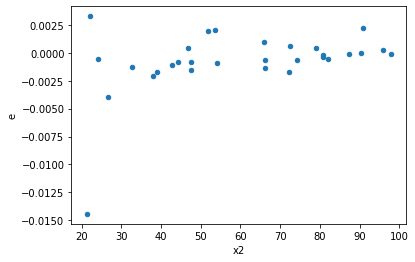

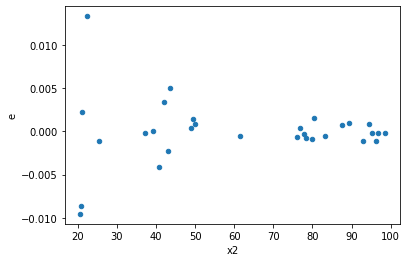

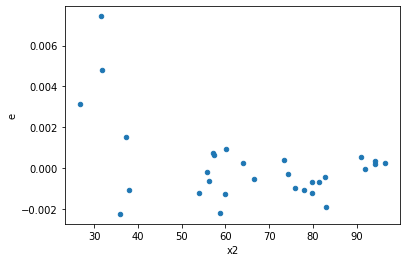

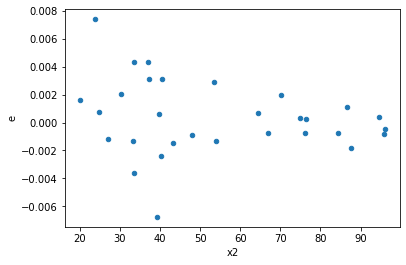

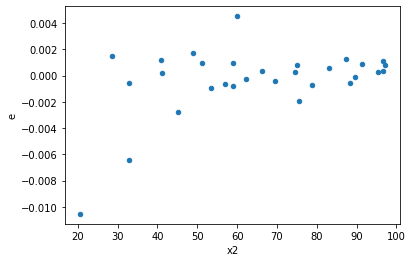

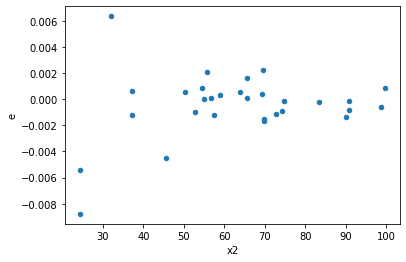

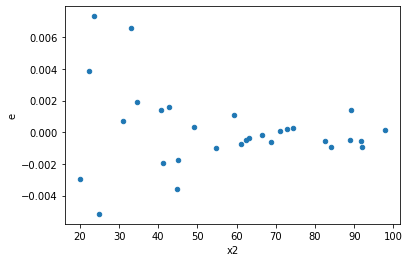

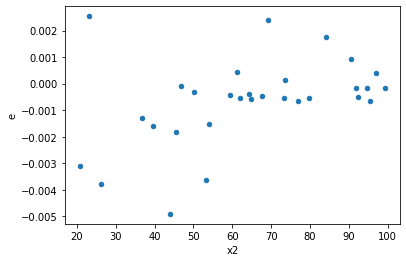

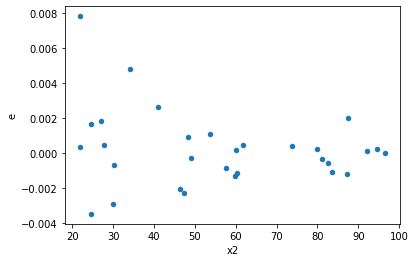

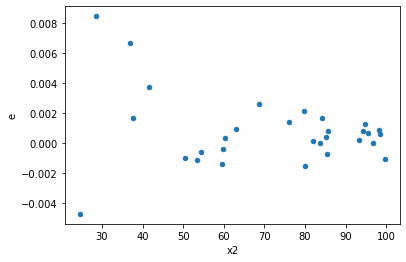

In [23]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [24]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [25]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,14.0,8.0,4.365307453815099e-05,0.0003088474938395001,3.118076752725071e-06,3.8605936729937514e-05,12.381329836155416,0.0012834749004440038,0.999358262549778,0.0006417374502220019,Reject001=0 : Heteroscedasticity
4.0,8.0,14.0,8.406007483632978e-06,9.295358671323028e-05,1.0507509354541223e-06,6.639541908087877e-06,6.318854149026614,0.0028891028129380825,0.998555448593531,0.0014445514064690412,Reject001=0 : Heteroscedasticity
5.0,4.0,18.0,2.82521695133439e-06,0.00015527117856139366,7.063042378335975e-07,8.626176586744091e-06,12.21311741410843,0.00011269602842300941,0.9999436519857885,5.6348014211504704e-05,Reject001=0 : Heteroscedasticity
6.0,11.0,11.0,4.8792451319752996e-05,5.469872530273012e-05,4.435677392704818e-06,4.972611391157284e-06,1.1210489291524086,0.8530836527516095,0.5734581736241953,0.42654182637580473,Reject001=1 : Homoscedasticity
7.0,12.0,10.0,1.8350690312685112e-05,3.5333326084348734e-05,1.5292241927237594e-06,3.5333326084348733e-06,2.3105393082629173,0.19393674890848955,0.9030316255457552,0.09696837445424478,Reject001=1 : Homoscedasticity
12.0,11.0,11.0,3.392876686795151e-05,5.898314224515373e-05,3.0844333516319556e-06,5.362103840468521e-06,1.7384404943071516,0.3729470094524794,0.8135264952737603,0.1864735047262397,Reject001=1 : Homoscedasticity
13.0,15.0,7.0,3.0477818765241912e-05,5.074702035173781e-05,2.0318545843494608e-06,7.249574335962544e-06,3.567959238718671,0.09597866786443965,0.9520106660677802,0.047989333932219824,Reject001=1 : Homoscedasticity
14.0,17.0,5.0,6.615029356252071e-05,2.740155778560477e-05,3.891193738971806e-06,5.480311557120954e-06,1.4083882542864725,0.7517549233994674,0.6241225383002663,0.3758774616997337,Reject001=1 : Homoscedasticity
16.0,14.0,8.0,2.197996415422086e-05,0.00025678867301267595,1.5699974395872042e-06,3.2098584126584494e-05,20.444991384842066,0.0002012295689859389,0.999899385215507,0.00010061478449296946,Reject001=0 : Heteroscedasticity


In [26]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,18.0,4.0,0.00016928118748314174,4.422244633991589e-06,9.404510415730096e-06,1.1055611584978972e-06,0.1175564819034835,0.0009782783616645065,Reject001=0 : Heteroscedasticity
1.0,14.0,8.0,4.365307453815099e-05,0.0003088474938395001,3.118076752725071e-06,3.8605936729937514e-05,12.381329836155416,0.0012834749004440038,Reject001=0 : Heteroscedasticity
2.0,16.0,6.0,7.084156754868868e-05,2.3355362480652907e-06,4.427597971793042e-06,3.892560413442151e-07,0.08791585049592437,0.00010528880220468911,Reject001=0 : Heteroscedasticity
3.0,17.0,5.0,0.00012515598449563056,2.2086137932358774e-05,7.362116735037091e-06,4.417227586471755e-06,0.5999942333771621,0.39296236078179186,Reject001=1 : Homoscedasticity
4.0,8.0,14.0,8.406007483632978e-06,9.295358671323028e-05,1.0507509354541223e-06,6.639541908087877e-06,6.318854149026614,0.0028891028129380825,Reject001=0 : Heteroscedasticity
5.0,4.0,18.0,2.82521695133439e-06,0.00015527117856139366,7.063042378335975e-07,8.626176586744091e-06,12.21311741410843,0.00011269602842300941,Reject001=0 : Heteroscedasticity
6.0,11.0,11.0,4.8792451319752996e-05,5.469872530273012e-05,4.435677392704818e-06,4.972611391157284e-06,1.1210489291524086,0.8530836527516095,Reject001=1 : Homoscedasticity
7.0,12.0,10.0,1.8350690312685112e-05,3.5333326084348734e-05,1.5292241927237594e-06,3.5333326084348733e-06,2.3105393082629173,0.19393674890848955,Reject001=1 : Homoscedasticity
8.0,12.0,10.0,5.7697323826466605e-05,3.384208444392853e-05,4.808110318872217e-06,3.3842084443928533e-06,0.7038541589009647,0.5571739710357418,Reject001=1 : Homoscedasticity


In [27]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      648
Reject001=0 : Heteroscedasticity    352
Name: Result_test, dtype: int64